# Restaurant Revenue Analysis
We take a look at a number of variables that contribute to the monthly revenues of a dataset of restaurants

We start by importing Pandas, numpy and matplotlib.

In [3]:
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; the foundation of pandas
import matplotlib.pyplot as plt # used for visualisations

In [4]:
df = pd.read_csv("Restaurant_revenue.csv")
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


We take a look at the dataset to look at the column data types and also to confirm no data is missing.

In [6]:
# Ensuring clean data and looking at data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


Monthly Revenue is then calculated by the product of the number of customers, average customer spending, and 30 days.

In [8]:
# Changing monthly revenue to be the product of number of customers and average customer spending and 30 days
df['Monthly_Revenue'] = df['Number_of_Customers']*df['Average_Customer_Spending']*30
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,66312.122519
1,24,40.020077,4.577892,Italian,17.952562,0,36,12925.844955
2,81,41.981485,4.652911,Japanese,22.600420,1,91,54919.021298
3,70,43.005307,4.416053,Italian,18.984098,1,59,39866.604966
4,30,17.456199,3.475052,Italian,12.766143,1,30,11489.528438


## Data Exploration
We take a look at the different cuisine types in the data to get an idea of the data we're working with.

In [10]:
# looking at the different cuisine types
df['Cuisine_Type'].unique()

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

The dataset is then grouped by the cuisine type. We then calculate the mean monthly revenue for each cuisine type.

The transformed data is then plotted with a bar chart for easy visualisation.

In [12]:
df_stat = df.groupby(['Cuisine_Type']).mean()
df_stat = df_stat.sort_values(by='Monthly_Revenue',ascending = False)

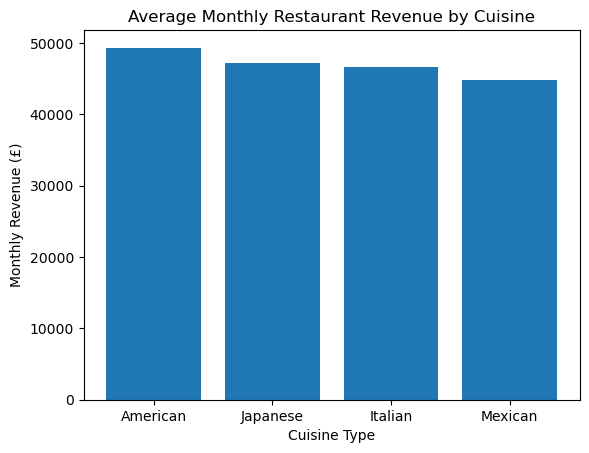

In [13]:
# plotting restaurant revenue to see difference between cuisines
plt.bar(df_stat.index, df_stat['Monthly_Revenue'])
plt.title('Average Monthly Restaurant Revenue by Cuisine')
plt.xlabel('Cuisine Type')
plt.ylabel('Monthly Revenue (£)')
plt.show()

We can see that American cuisine generates the most revenue on average followed by Japanese, Italian and finally Mexican cuisine.

We proceed to take a look at how promotions affect the monthly revenue of the different cuisines.

In [16]:
# Separating the dataset into restaurants with and without promotions
df_promo = df[df['Promotions'] == 1]
df_nopromo = df[df['Promotions'] == 0]
df_nopromo.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,66312.122519
1,24,40.020077,4.577892,Italian,17.952562,0,36,12925.844955
6,96,35.350343,16.960318,American,20.181622,0,86,58123.070545
8,84,22.647863,15.841873,American,11.732611,0,26,29566.179544
9,97,33.532267,8.095969,Italian,37.973579,0,98,110503.113872


In [17]:
df_promo_stat = df_promo.groupby(['Cuisine_Type']).mean()
df_promo_stat = df_promo_stat.sort_values(by='Monthly_Revenue',ascending = False)
df_nopromo_stat = df_nopromo.groupby(['Cuisine_Type']).mean()
df_nopromo_stat = df_nopromo_stat.sort_values(by='Monthly_Revenue',ascending = False)

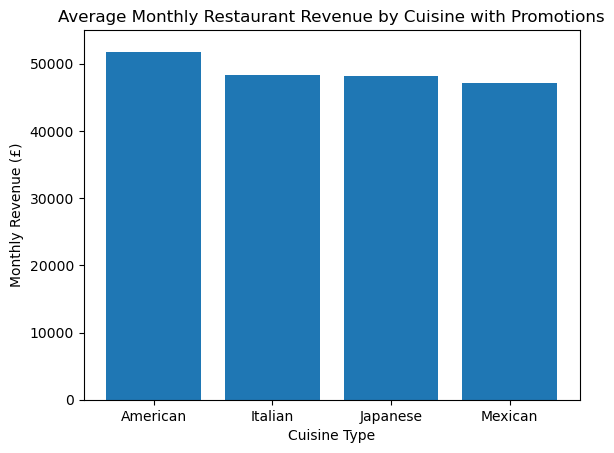

In [18]:
# plotting restaurant revenue with promotions to see difference between cuisines
plt.bar(df_promo_stat.index, df_promo_stat['Monthly_Revenue'])
plt.title('Average Monthly Restaurant Revenue by Cuisine with Promotions')
plt.xlabel('Cuisine Type')
plt.ylabel('Monthly Revenue (£)')
plt.ylim(0,55000)
plt.show()

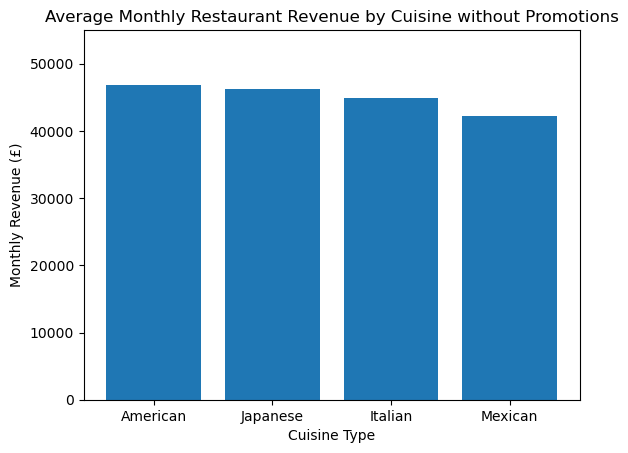

In [19]:
# plotting restaurant revenue without promotions to see difference between cuisines
plt.bar(df_nopromo_stat.index, df_nopromo_stat['Monthly_Revenue'])
plt.title('Average Monthly Restaurant Revenue by Cuisine without Promotions')
plt.xlabel('Cuisine Type')
plt.ylabel('Monthly Revenue (£)')
plt.ylim(0,55000)
plt.show()

In [ ]:
list = ['Number_of_Customers','Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews', 'Monthly_Revenue']
df_promo_stat['Promo_Monthly_Revenue'] = df_promo_stat['Monthly_Revenue']
df_promo_stat1 = df_promo_stat.drop(list, axis = 1)
df_promo_comp = df_promo_stat1
df_promo_comp['No_Promo_Monthly_Revenue'] = df_nopromo_stat['Monthly_Revenue']
df_promo_comp

From both the graphs as well as the table detailing the figures, we can see that restaurants running promotions tend to have a greater monthly revenue than those not running any regardless of the cuisine type.

We proceed to the comparison between monthly revenue and two variables, namely marketing spend, and average menu price.

Text(0, 0.5, 'Monthly Revenue (£)')

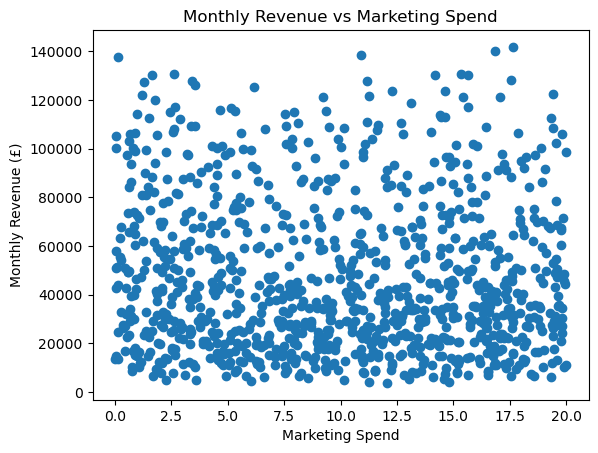

In [22]:
# Plotting marketing spend against monthly revenue to find a trend
plt.scatter(df['Marketing_Spend'],df['Monthly_Revenue'])
plt.title('Monthly Revenue vs Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Monthly Revenue (£)')

Text(0, 0.5, 'Monthly Revenue (£)')

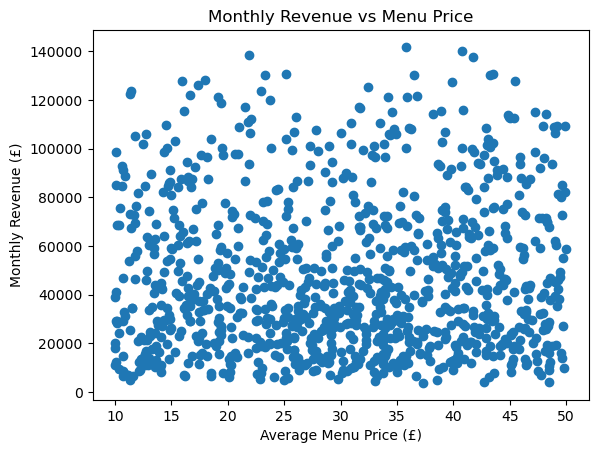

In [23]:
# Plotting average menu prices against monthly revenue to find a trend
plt.scatter(df['Menu_Price'],df['Monthly_Revenue'])
plt.title('Monthly Revenue vs Menu Price')
plt.xlabel('Average Menu Price (£)')
plt.ylabel('Monthly Revenue (£)')

We can observe that the two variables, marketing spend and average menu price have no correlation with the monthly revenue of the restaurant.

## Conclusions and Recommendations

Concluding our analysis, we can see that two variables that affect the monthly revenue are the cuisine type and whether promotions are being run.

Thus, the recommendation for any new restaurant based on the data and analysis is to open a restaurant serving American cuisine and r